# Homework 2

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rhennig/EMA6938/blob/main/Notebooks/Homework2.ipynb)

## Problem 1. Information Entropy
(100 points using the rubric)

a) Compute the information entropy for the random variable $X$, where $X$ is the sum of the values of two (fair) six-sided dice.

b) In the class, we define the information entropy based on a discrete random variable X. Now consider the case that $X$ is a continuous random variable with the probability density function $p(x)$. The entropy is defined as:
$$
H(X) = − \int p(x)\, \ln(p(x)) dx.
$$
Assume that $p(X)$ is a Gaussian distribution with the mean $\mu$ and variance $\sigma^2$, i.e.
$$
p(x)= \frac{1}{\sqrt{2\pi} \sigma} \, \exp \left ( -\frac{(x−\mu)^2}{2\sigma^2} \right)
$$
Calculate the entropy of $p(x)$.

## Problem 2. Difference between Principal Component Analysis and Linear Regression
(100 points using the rubric)

Principal component analysis (PCA) is an unsupervised learning method. PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.

Linear regression is a supervised learning method that minimizes the mean squared error for the prediction.

Both methods are linear.

In the following excercise, you will apply them to a simple dataset of $(x,y)$ tuples.

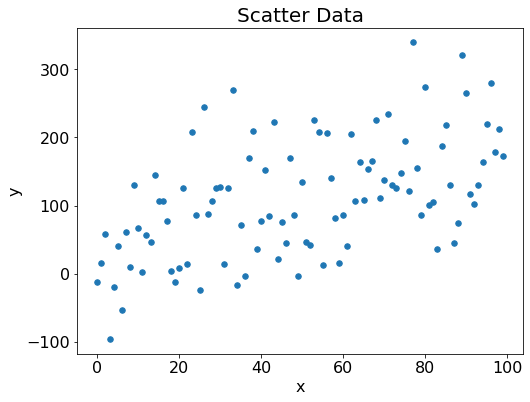

In [1]:
# Import required modules
import numpy as np
import matplotlib.pyplot as plt

# Define a simple range of values for x and reshape so sklearn likes it
x=np.array(range(0,100))
x=x[:, np.newaxis]

# Define y as a function of x and introduce some noise.
y=10+2*x.ravel()+np.random.normal(loc=0, scale=70, size=100)

# Plot the loaded data set
plt.figure(figsize=(8, 6))
plt.rcParams['font.size'] = '16'
plt.scatter(x, y, s = 30, marker = 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Data', fontsize=20)
plt.show()

a) Use sklearn to fit a linear regression model for
$$
y=f(x) = mx+n.
$$

b) Now, let us switch the dependent and independent variable. Use sklearn to fit a linear regression model for
$$
x = g(y) = ay + b.
$$
Plot the data $(x,y)$ and both models, $y = f(x)$ and $x = g(y)$.

c) Are these two functions that same? If no, why do the differ? Think about what each function minimizes.

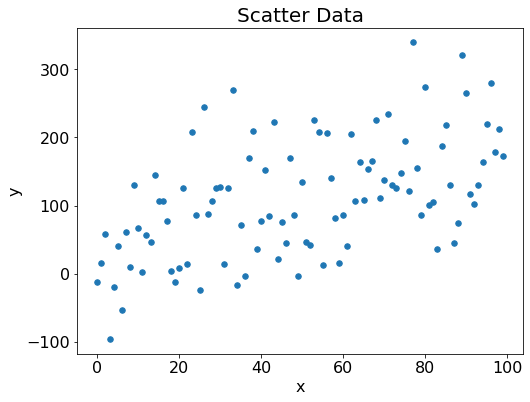

In [2]:
# Linear regression model for y = f(x) = mx + n

# Linear regression model for x = g(y) = ay + b

# Plot of the datapoints (x,y), (x,f(x)), and (g(y), y)
# Plot the loaded data set
plt.figure(figsize=(8, 6))
plt.rcParams['font.size'] = '16'
plt.scatter(x, y, s = 30, marker = 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Data', fontsize=20)
plt.show()


d) Use sklearn to perform a PCA on the $(x,y)$ dataset. Project the data on the first principal component.

e) Plot the resulting projected data and compare to the two previous linear regressions. How does the PCA differ from the $f(x)$ and $g(y)$. Explain the difference by considering what the PCA and the two linear regressions optimize?

In [3]:
#Combine x and y
xy=np.array([x.ravel(),y]).T

# Perform PCA and project onto component 1

# Plot the projected data and f(x) and g(y)


## Problem 3. Learning of experimental bandgaps

We will use a dataset from Materials Project that includes over 4,000 experimental bandgaps of materials. Your task is to optimize several machine learning models to the dataset and validate the prediction error.

a) Generate a random 80/20 train-test split and remove the target property from the training and testing data.

b) Select two machine learning regression models from the following list
  - random forest
  - gradient boosted trees
  - kernel ridge regression
  - support vector regression.

Optimize a set of hyperparameters for the models and then train a model. Report the prediction effor for the training set.
  
c) Validate the model on the training set and report the prediction error. Plot the prediction of the model vs. the ground truth. Comment on the accuracy of the two machine learning models, their bias and variance. Which model performs better?

In [4]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from matminer.datasets import load_dataset
from matminer.featurizers.base import MultipleFeaturizer
from matminer.featurizers import composition as cf
from matminer.featurizers.conversions import StrToComposition

import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

data = load_dataset("expt_gap")
data.describe()

,gap expt
count,6354.000000
mean,1.252225
std,1.539961
min,0.000000
25%,0.000000
50%,0.710000
75%,2.130000
max,11.700000


In [5]:
data.head()

,formula,gap expt
0,Hg0.7Cd0.3Te,0.35
1,CuBr,3.08
2,LuP,1.30
3,Cu3SbSe4,0.40
4,ZnO,3.44


In [6]:
# How many unique compositions do we have?
data["formula"].unique().shape[0]

4934

In [7]:
# Sort by size of badgap
data = data.sort_values('gap expt')

# Remove duplicate compositions
data = data.drop_duplicates('formula')

data.describe()

,gap expt
count,4934.000000
mean,1.042454
std,1.481024
min,0.000000
25%,0.000000
50%,0.070000
75%,1.900000
max,11.700000


### Obtain a Feature Vector for Each Material

The first step in building a machine learning model is to convert the raw materials data, here the composition, into the required input for an ML model: a finite list of quantitative attributes. Here we use the Magpie descriptors from Ward et al.

In [8]:
feature_calculators = MultipleFeaturizer([cf.Stoichiometry(), cf.ElementProperty.from_preset("magpie"),
                                          cf.ValenceOrbital(props=['avg']), cf.IonProperty(fast=True)])

# Get the feature names
feature_labels = feature_calculators.feature_labels()

# Compute the features for all materials entries
data = StrToComposition(target_col_id='composition_obj').featurize_dataframe(data, 'formula')
data = feature_calculators.featurize_dataframe(data, col_id='composition_obj', ignore_errors=True);

StrToComposition:   0%|          | 0/4934 [00:00<?, ?it/s]

MultipleFeaturizer:   0%|          | 0/4934 [00:00<?, ?it/s]

/Users/rhennig/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.unsupervised module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/rhennig/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.unsupervised module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/rhennig/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: T

In [9]:
print('Generated %d features'%len(feature_labels))
print('Training set size:', 'x'.join([str(x) for x in data[feature_labels].shape]))
print('Feature labels', feature_labels)

Generated 145 features
Training set size: 4934x145
Feature labels ['0-norm', '2-norm', '3-norm', '5-norm', '7-norm', '10-norm', 'MagpieData minimum Number', 'MagpieData maximum Number', 'MagpieData range Number', 'MagpieData mean Number', 'MagpieData avg_dev Number', 'MagpieData mode Number', 'MagpieData minimum MendeleevNumber', 'MagpieData maximum MendeleevNumber', 'MagpieData range MendeleevNumber', 'MagpieData mean MendeleevNumber', 'MagpieData avg_dev MendeleevNumber', 'MagpieData mode MendeleevNumber', 'MagpieData minimum AtomicWeight', 'MagpieData maximum AtomicWeight', 'MagpieData range AtomicWeight', 'MagpieData mean AtomicWeight', 'MagpieData avg_dev AtomicWeight', 'MagpieData mode AtomicWeight', 'MagpieData minimum MeltingT', 'MagpieData maximum MeltingT', 'MagpieData range MeltingT', 'MagpieData mean MeltingT', 'MagpieData avg_dev MeltingT', 'MagpieData mode MeltingT', 'MagpieData minimum Column', 'MagpieData maximum Column', 'MagpieData range Column', 'MagpieData mean Colu

In [10]:
# Retain only numerical values
data_num = data.select_dtypes([np.number])
data_num.head(10)
data_num.describe()

,gap expt,0-norm,2-norm,3-norm,5-norm,7-norm,10-norm,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,...,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,avg s valence electrons,avg p valence electrons,avg d valence electrons,avg f valence electrons,max ionic char,avg ionic char
count,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4933.000000,4933.000000,4933.000000,...,4933.000000,4933.000000,4933.000000,4933.000000,4933.000000,4933.000000,4933.000000,4933.000000,4933.000000,4933.000000
mean,1.042454,3.021281,0.663279,0.602817,0.573417,0.565681,0.561354,19.426718,57.569633,38.142915,...,131.720860,138.140163,52.257520,101.629840,1.845001,1.888540,4.513762,1.819700,0.345914,0.063426
std,1.481024,0.713992,0.072369,0.088178,0.100393,0.105375,0.108943,14.675379,18.989044,20.044184,...,79.048725,55.122686,34.088376,85.679466,0.235426,1.085544,3.213897,2.814162,0.264493,0.052034
min,0.000000,2.000000,0.500000,0.396850,0.329877,0.304753,0.287175,1.000000,5.000000,1.000000,...,0.000000,8.000000,0.000000,2.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.612372,0.538609,0.506099,0.501109,0.500098,8.000000,46.000000,22.000000,...,52.000000,93.350000,16.932099,14.000000,1.750000,0.857143,1.666667,0.000000,0.109169,0.019482
50%,0.070000,3.000000,0.654654,0.598828,0.574349,0.552045,0.546393,15.000000,57.000000,37.000000,...,159.000000,127.928571,55.111111,70.000000,2.000000,2.153846,4.000000,0.000000,0.285663,0.049707
75%,1.900000,4.000000,0.707107,0.652985,0.626314,0.625147,0.625007,30.000000,75.000000,52.000000,...,213.000000,194.000000,83.657764,194.000000,2.000000,2.666667,7.142857,3.000000,0.539020,0.097843
max,11.700000,4.000000,0.999001,0.999000,0.999000,0.999000,0.999000,83.000000,92.000000,91.000000,...,227.000000,229.000000,113.500000,229.000000,2.000000,5.000000,10.000000,14.000000,0.921450,0.230363


In [11]:
# Drop the columns that include incomplete data
data_num = data_num.dropna(axis=0)

data_num.describe()

,gap expt,0-norm,2-norm,3-norm,5-norm,7-norm,10-norm,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,...,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,avg s valence electrons,avg p valence electrons,avg d valence electrons,avg f valence electrons,max ionic char,avg ionic char
count,4933.000000,4933.000000,4933.000000,4933.000000,4933.000000,4933.000000,4933.000000,4933.000000,4933.000000,4933.000000,...,4933.000000,4933.000000,4933.000000,4933.000000,4933.000000,4933.000000,4933.000000,4933.000000,4933.000000,4933.000000
mean,1.042418,3.021083,0.663211,0.602737,0.573331,0.565594,0.561266,19.426718,57.569633,38.142915,...,131.720860,138.140163,52.257520,101.629840,1.845001,1.888540,4.513762,1.819700,0.345914,0.063426
std,1.481172,0.713928,0.072219,0.088007,0.100220,0.105205,0.108777,14.675379,18.989044,20.044184,...,79.048725,55.122686,34.088376,85.679466,0.235426,1.085544,3.213897,2.814162,0.264493,0.052034
min,0.000000,2.000000,0.500000,0.396850,0.329877,0.304753,0.287175,1.000000,5.000000,1.000000,...,0.000000,8.000000,0.000000,2.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.612372,0.538609,0.506099,0.501109,0.500098,8.000000,46.000000,22.000000,...,52.000000,93.350000,16.932099,14.000000,1.750000,0.857143,1.666667,0.000000,0.109169,0.019482
50%,0.070000,3.000000,0.654654,0.598828,0.574349,0.552045,0.546393,15.000000,57.000000,37.000000,...,159.000000,127.928571,55.111111,70.000000,2.000000,2.153846,4.000000,0.000000,0.285663,0.049707
75%,1.900000,4.000000,0.707107,0.652985,0.626314,0.625147,0.625007,30.000000,75.000000,52.000000,...,213.000000,194.000000,83.657764,194.000000,2.000000,2.666667,7.142857,3.000000,0.539020,0.097843
max,11.700000,4.000000,0.999001,0.999000,0.999000,0.999000,0.999000,83.000000,92.000000,91.000000,...,227.000000,229.000000,113.500000,229.000000,2.000000,5.000000,10.000000,14.000000,0.921450,0.230363
